In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import os

import util_functions as fs
import imp
imp.reload(fs)

%matplotlib inline

In [17]:
#Read Image
sheets = fs.get_images('./data/Tab_Butterfly-Waltz-Ukulele', resize_factor=1.0, threshold=200)

>>> Folder : ./data/Tab_Butterfly-Waltz-Ukulele : 2 files
01 : ./data/Tab_Butterfly-Waltz-Ukulele/p1.jpg : (2339, 1653)
02 : ./data/Tab_Butterfly-Waltz-Ukulele/p2.jpg : (2339, 1653)
>>> Inverse binary thresholding with threshold value 200


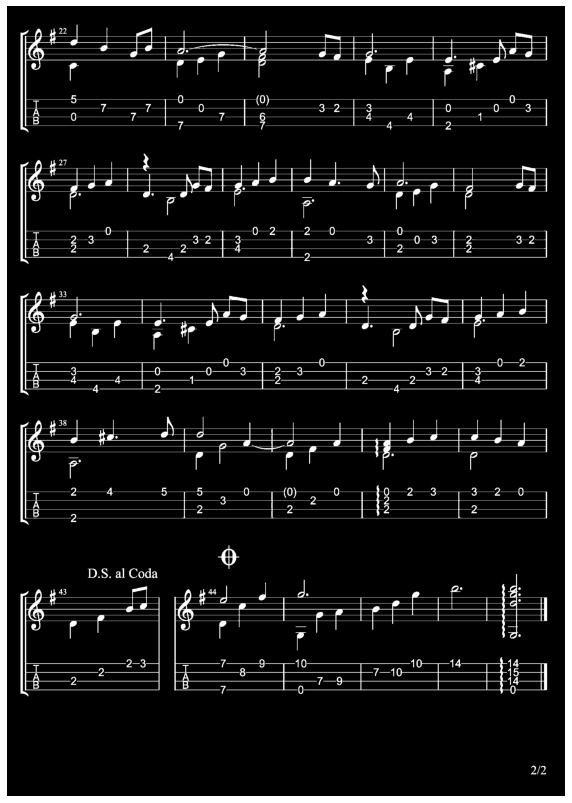

In [18]:
sample_image = sheets[1]
fs.plot_single_image(sample_image)

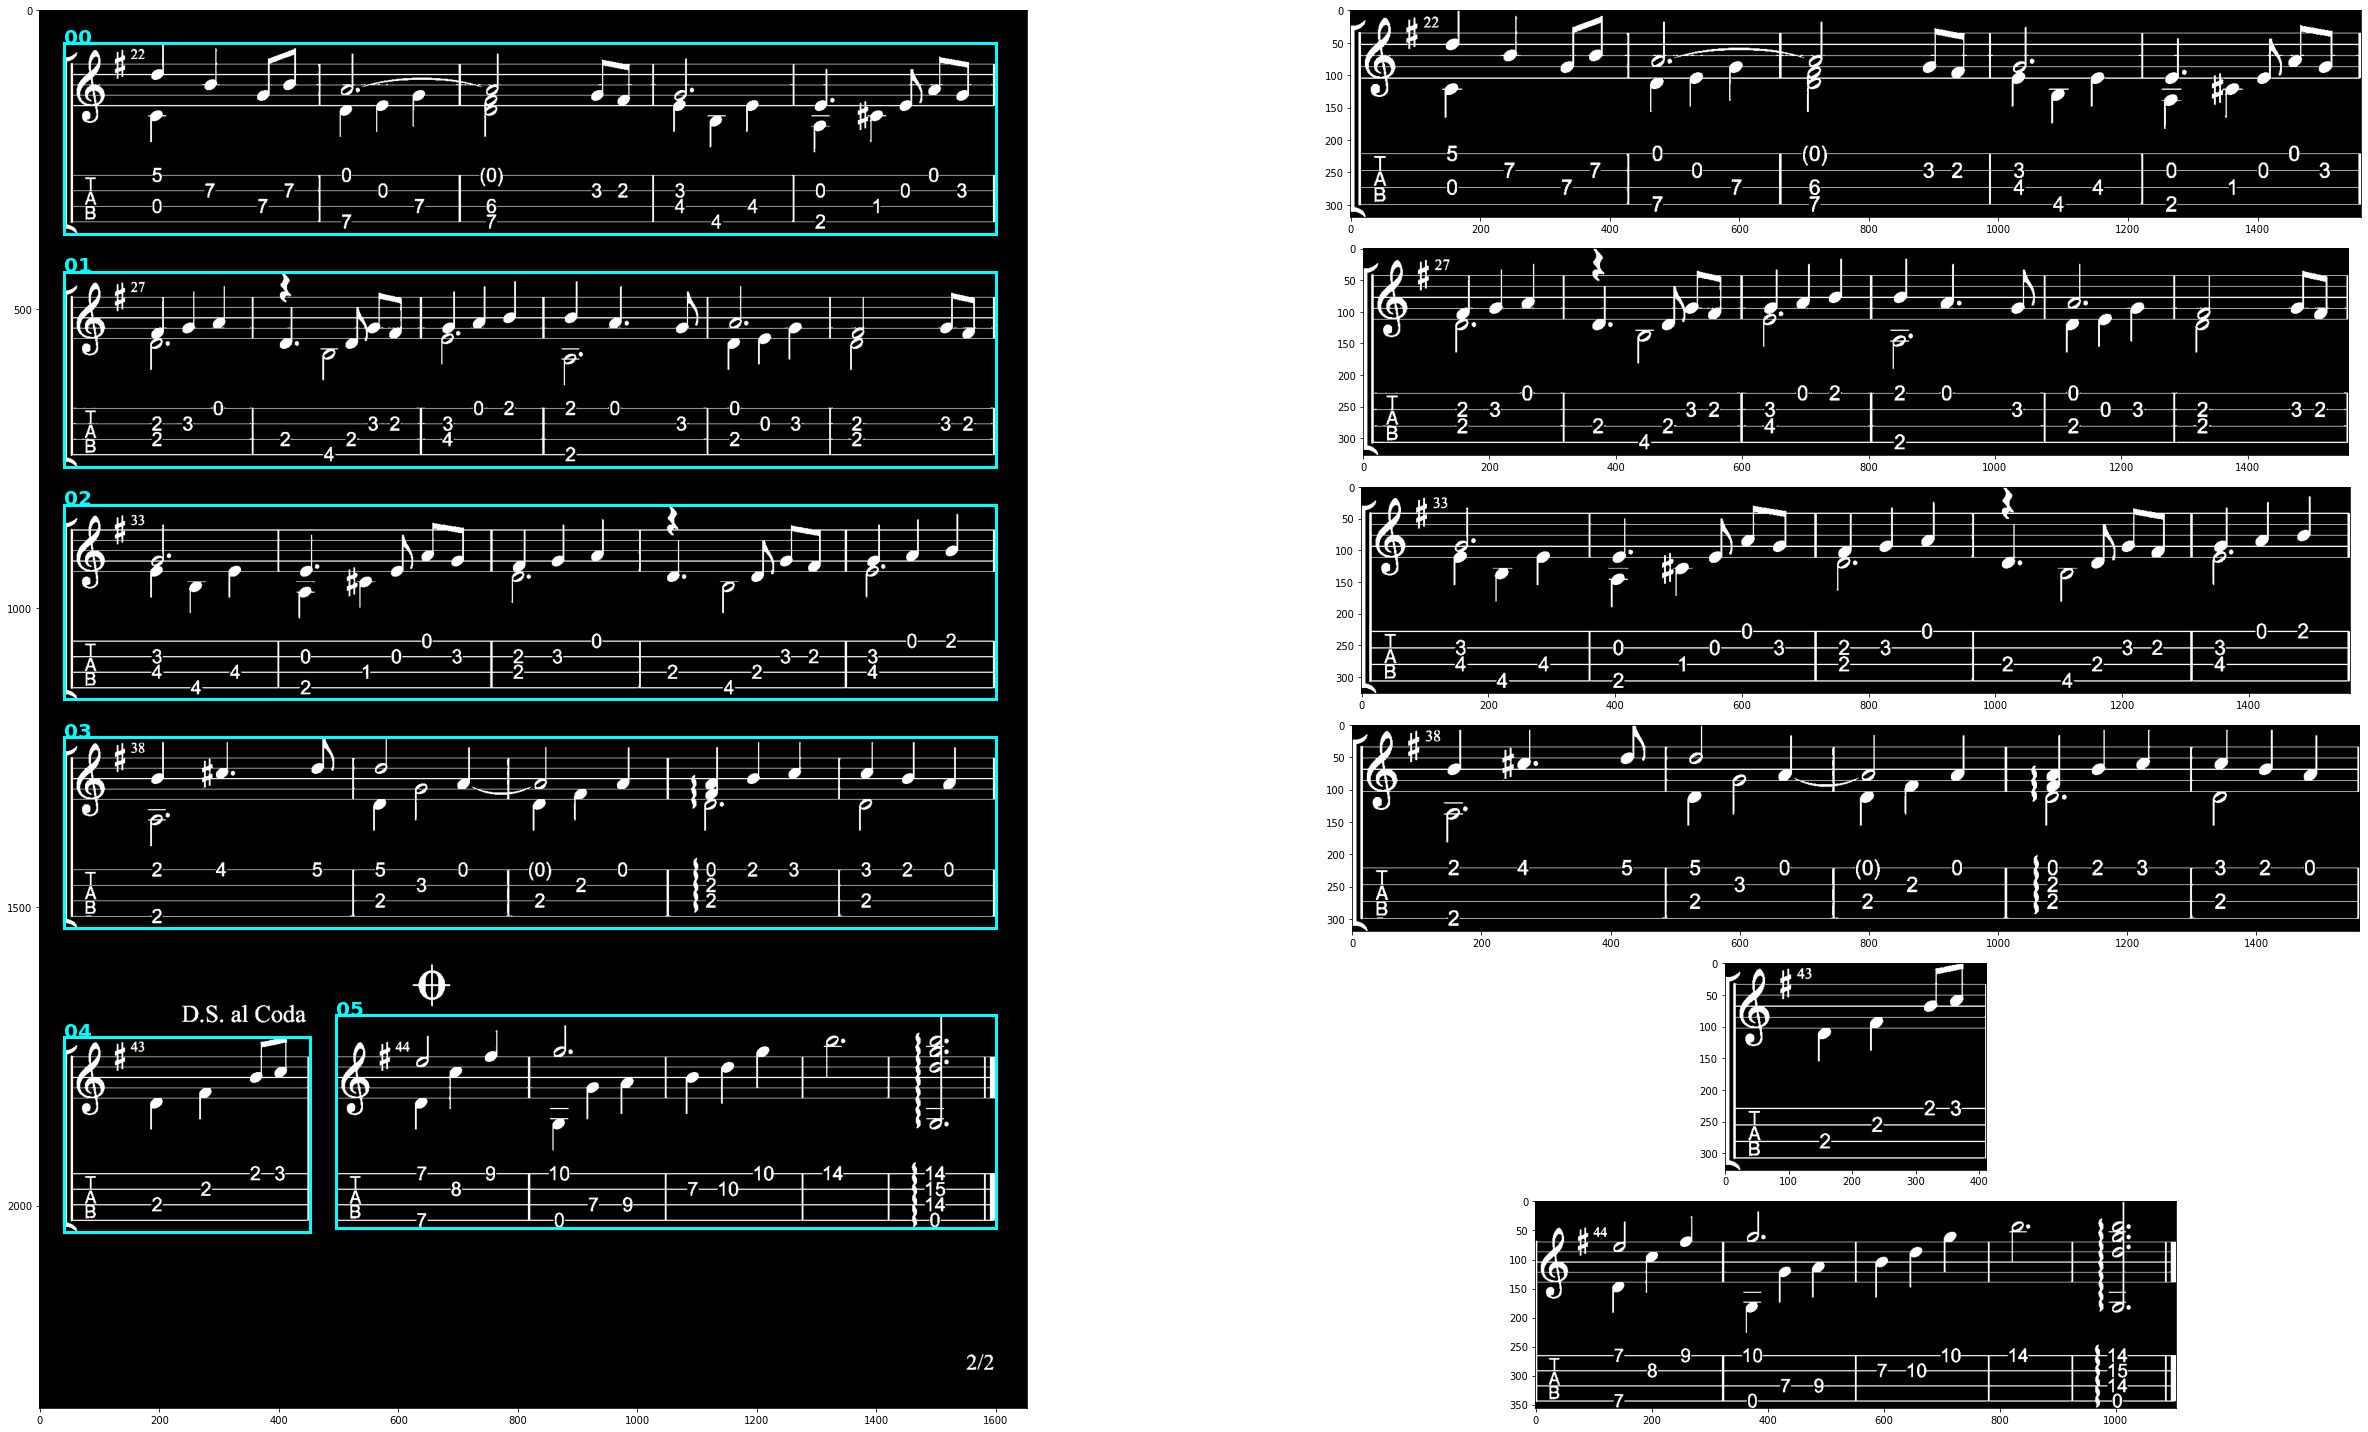

In [24]:
main_components, pos, _ = fs.get_main_components(sample_image)
row = len(main_components)

fig = plt.figure(figsize=(40,20))
ax = plt.subplot2grid((row, 2), (0, 0), rowspan=row)
ax.imshow(sample_image, cmap='gray')
for i, (x, y, w, h, area) in enumerate(pos):  #Highlighting
    ax.add_patch(patches.Rectangle((x, y), w, h, edgecolor='cyan', fill=False, linewidth=3))
    ax.text(x, y, f'{i:02d}', color='cyan', fontsize=20, fontweight='bold')
    
for i in range(len(main_components)):
    ax = plt.subplot2grid((row, 2), (i, 1))
    ax.imshow(main_components[i], cmap='gray')
    
fig.set_tight_layout(True)
plt.show() 

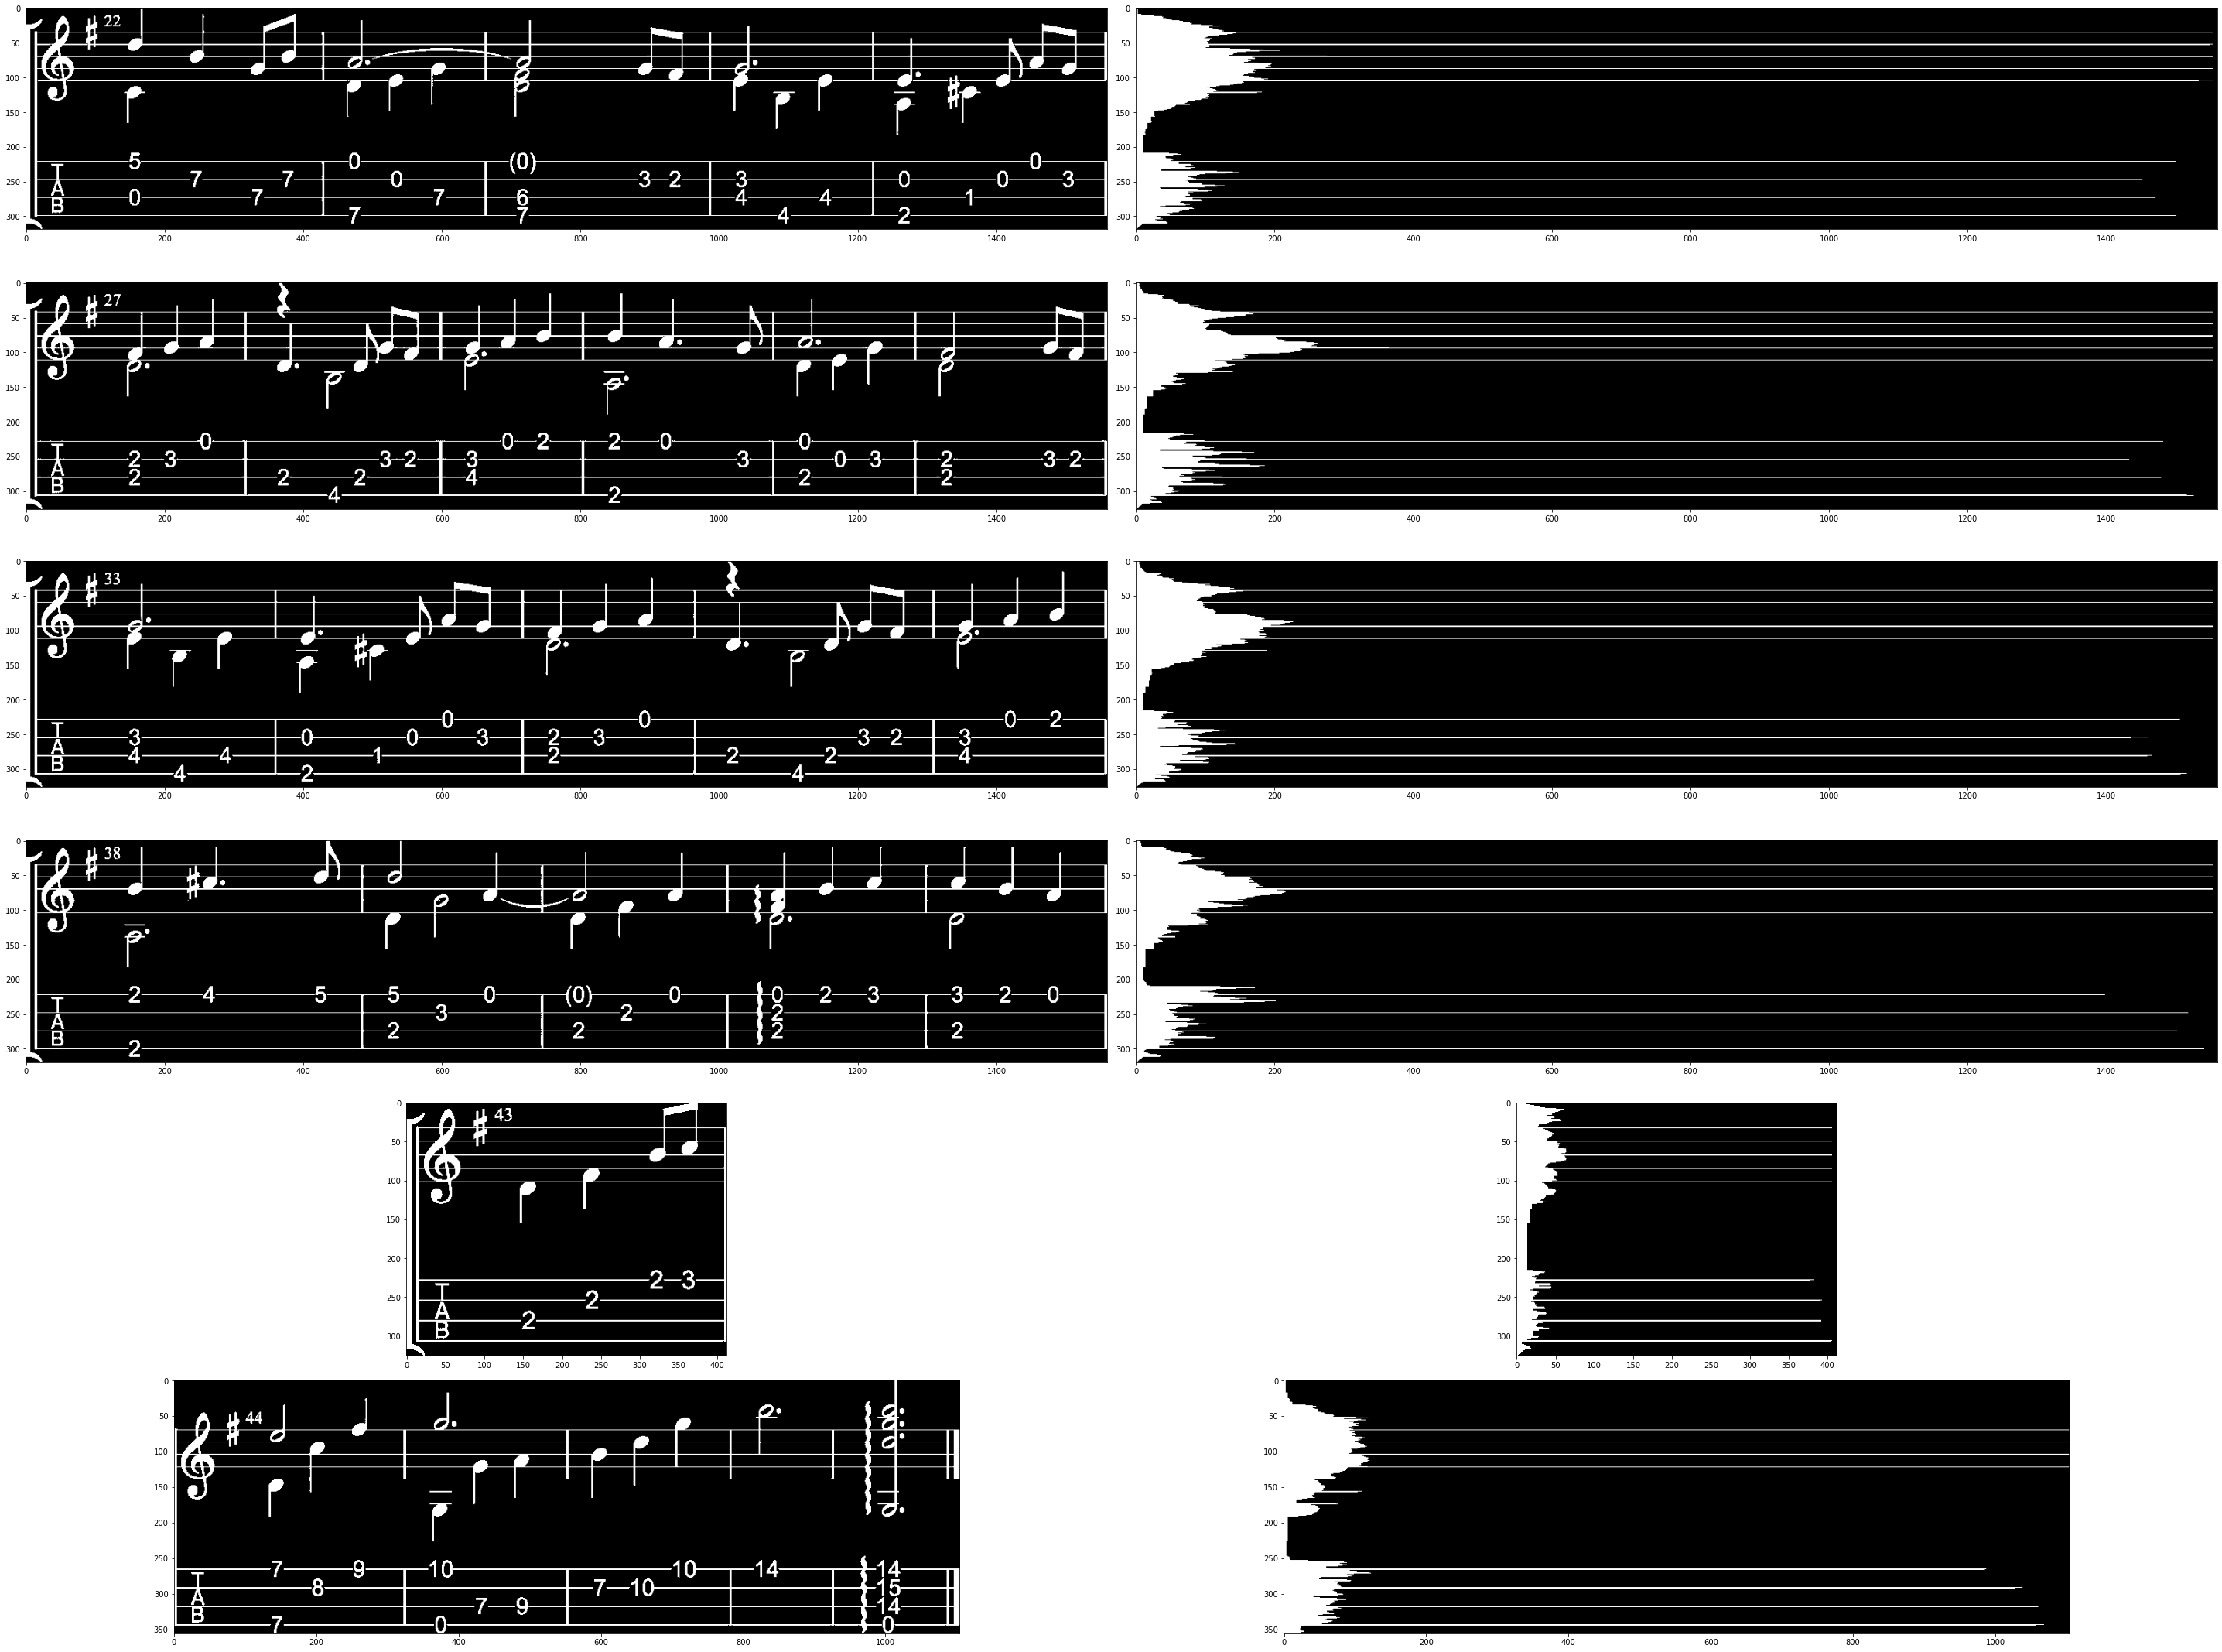

In [33]:
fig = plt.figure(figsize=(40,30))

for i, component in enumerate(main_components):
    ax = plt.subplot2grid((len(main_components), 2), (i, 0))
    ax.imshow(component, cmap='gray')
    
    component = np.uint8(component/255)
    pix_hist = np.sum(component, axis=1)
    pix_hist_image = np.zeros(component.shape)

    for row, num in enumerate(pix_hist):
        pix_hist_image[row,:num] = 255
        
    ax = plt.subplot2grid((len(main_components), 2), (i, 1))
    ax.imshow(pix_hist_image, cmap='gray')
    
fig.set_tight_layout(True)
plt.show() 